In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv("C:/Users/akash/Downloads/PYTHON/data_jobs.csv")

#clean job_posted_date and job_skills to df column
df.job_posted_date = pd.to_datetime(df.job_posted_date) 

df = df.dropna(subset= 'job_skills')
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills))

In [88]:
file = df[df['job_title_short'] == 'Data Analyst'].copy()

In [101]:
file['job_posted_month'] = file['job_posted_date'].dt.month

In [102]:
file_exploded = file.explode(['job_skills'])

In [103]:
top_7_skills = ['python', 'excel', 'tableau', 'power bi', 'r', 'sas','sql']
file_exploded = file_exploded[file_exploded['job_skills'].isin(top_7_skills)]

In [104]:
tabl = file_exploded.pivot_table(
    index= 'job_posted_month',
    columns= 'job_skills',
    aggfunc= 'size',
    fill_value= 0
)

tabl

job_skills,excel,power bi,python,r,sas,sql,tableau
job_posted_month,,,,,,,
1,8170,4285,6606,3607,3830,11336,5596
2,5772,3307,4751,2576,2634,7947,3936
3,5675,3176,4741,2650,2554,7868,4051
4,5496,3106,4557,2399,2598,7553,3776
5,4773,2695,4070,2093,1940,6617,3245
6,5724,3275,4707,2442,2174,7584,3812
7,5513,3350,4831,2444,2118,7687,3928
8,6482,3859,5576,2975,2560,8823,4533
9,4886,3118,4229,2146,1880,6829,3446


<Axes: xlabel='job_posted_month'>

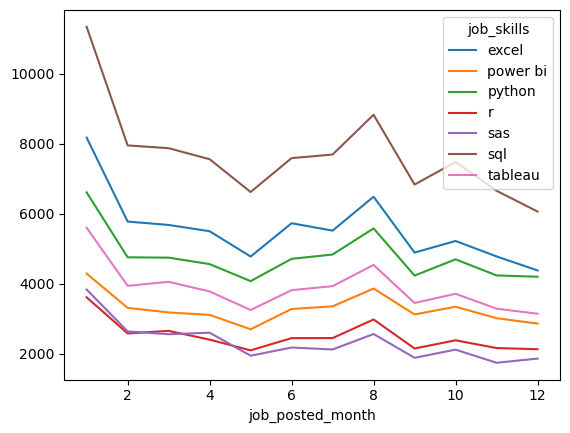

In [105]:

tabl.plot(kind= 'line')